In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('drug200.csv')

In [32]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [33]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [34]:
data.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [35]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [36]:
data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [37]:
data.iloc[:, 2:4] = data.iloc[:, 2:4].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
data['Drug'] = data['Drug'].replace({'drugY': 4, 'drugC': 2, 'drugX': 3, 'drugA': 0, 'drugB': 1})

C:\Users\rayaf\AppData\Local\Temp\ipykernel_14368\1831665457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 2:4] = data.iloc[:, 2:4].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
C:\Users\rayaf\AppData\Local\Temp\ipykernel_14368\1831665457.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Drug'] = data['Drug'].replace({'drugY': 4, 'drugC': 2, 'drugX': 3, 'drugA': 0, 'drugB': 1})


In [38]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,2,25.355,4
1,47,0,0,2,13.093,2
2,47,0,0,2,10.114,2
3,28,1,1,2,7.798,3
4,61,1,0,2,18.043,4
...,...,...,...,...,...,...
195,56,1,0,2,11.567,2
196,16,0,0,2,12.006,2
197,52,0,1,2,9.894,3
198,23,0,1,1,14.020,3


In [39]:
X = data.loc[:, 'Age':'Na_to_K']
y = data['Drug']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [60]:
tree= DecisionTreeClassifier(max_depth=5,random_state=42)
ada = AdaBoostClassifier(estimator=tree, n_estimators=100,learning_rate=0.1,random_state=42)
ada.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeC...ndom_state=42)
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",100
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None


In [61]:
print(f'Train score: {ada.score(X_train, y_train)}\nTest score: {ada.score(X_test, y_test)}')
print(classification_report(y_test, ada.predict(X_test)))
print(confusion_matrix(y_test, ada.predict(X_test)))
print('-'*50)
print(classification_report(y_train, ada.predict(X_train)))

Train score: 1.0
Test score: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60

[[ 7  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00       

In [43]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(
        random_state=42))
])

In [44]:
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3,5,7,None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 3, 5],
    'clf__max_features': [None, 'sqrt', 'log2']
}

In [45]:
gridSearch = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'clf__criterion': ['gini', 'entropy'], 'clf__max_depth': [3, 5, ...], 'clf__max_features': [None, 'sqrt', ...], 'clf__min_samples_leaf': [1, 3, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the comput

In [46]:
rdf = pd.DataFrame(gridSearch.cv_results_)

srdf = rdf[[
    'rank_test_score',
    'mean_test_score',
    'param_clf__criterion',
    'param_clf__min_samples_split',
]].sort_values(by='rank_test_score')

print(srdf.to_string())

     rank_test_score  mean_test_score param_clf__criterion  param_clf__min_samples_split
31                 1         1.000000                 gini                             5
30                 1         1.000000                 gini                             2
29                 1         1.000000                 gini                            10
27                 1         1.000000                 gini                             2
28                 1         1.000000                 gini                             5
58                 1         1.000000                 gini                             5
57                 1         1.000000                 gini                             2
56                 1         1.000000                 gini                            10
62                 1         1.000000                 gini                            10
55                 1         1.000000                 gini                             5
61                 1 

In [47]:
print(f"Best Parameters Found: {gridSearch.best_params_}")
print(f"Best Cross-Validation Accuracy: {gridSearch.best_score_:.4f}\n")

best_model = gridSearch.best_estimator_
y_pred = best_model.predict(X_test)

Best Parameters Found: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Cross-Validation Accuracy: 1.0000



In [48]:
label_map = {
    4: 'drugY',
    2: 'drugC',
    3: 'drugX',
    0: 'drugA',
    1: 'drugB'
}

labels = [label_map[i] for i in best_model.classes_]
print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



In [49]:
y_pred_train = best_model.predict(X_train)
print(classification_report(y_train, y_pred_train, target_names=labels))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        16
       drugB       1.00      1.00      1.00        11
       drugC       1.00      1.00      1.00        11
       drugX       1.00      1.00      1.00        38
       drugY       1.00      1.00      1.00        64

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [50]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 27]])

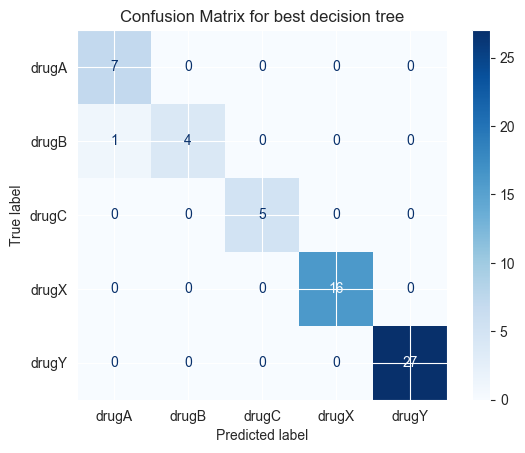

In [51]:
dsply = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)
dsply.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for best decision tree')
plt.show()

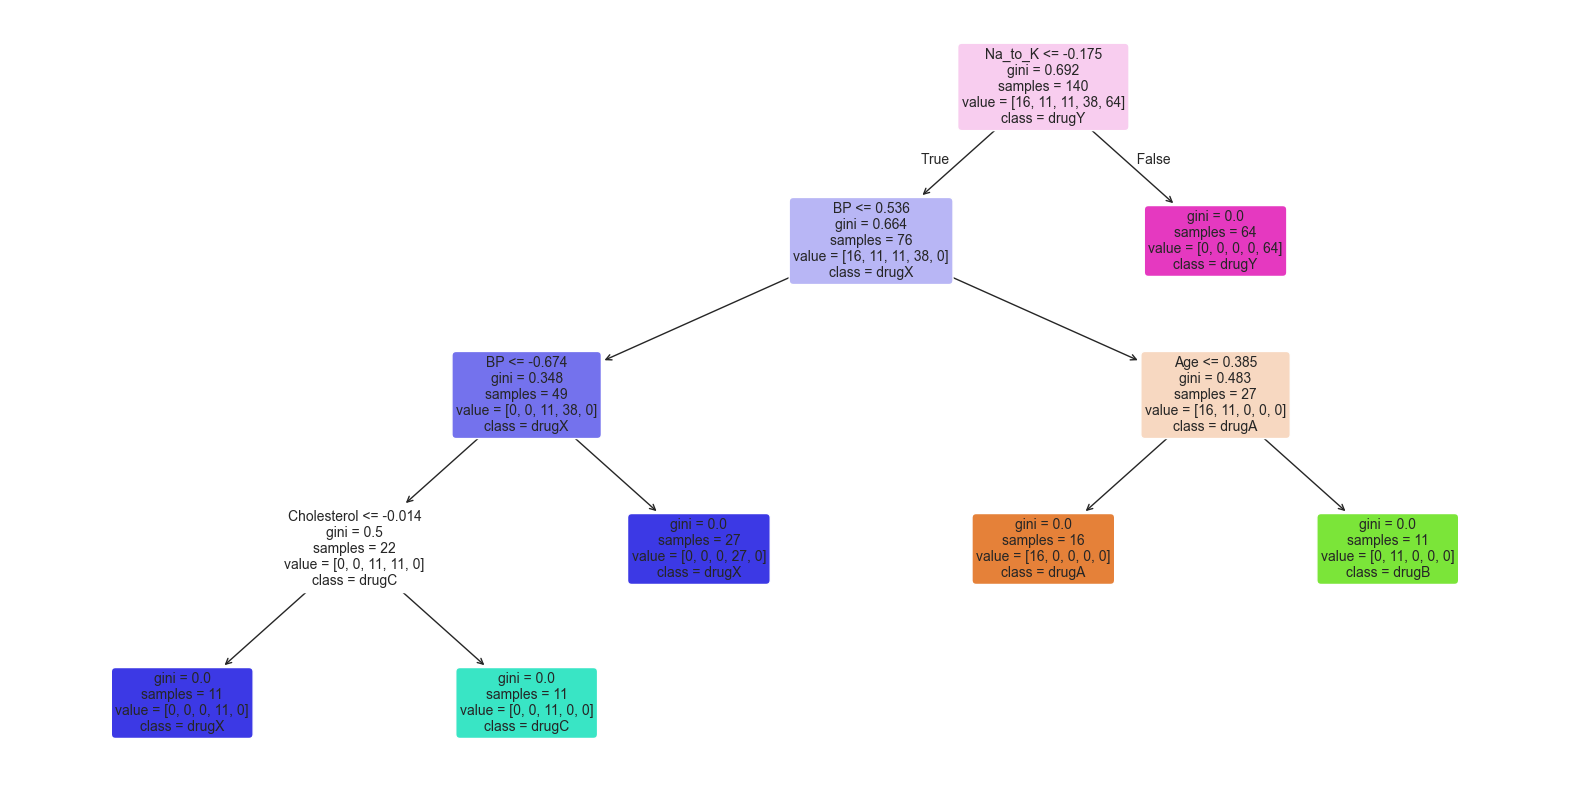

In [52]:
plt.figure(figsize=(20, 10))

plot_tree(
    best_model.named_steps['clf'],
    feature_names=data.columns,
    class_names=labels,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [53]:
feature_importance= best_model.named_steps['clf'].feature_importances_
feature_importance_df= pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
4,Na_to_K,0.479234
2,BP,0.272633
0,Age,0.134581
3,Cholesterol,0.113553
1,Sex,0.000000
